In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pré-Processamento

## Data Augmentation







In [ ]:
# import os

# def rename_files(directory):
#     for filename in os.listdir(directory):
#         if filename.endswith(".tif") or filename.endswith(".png"):
#             # Extrair o número antes do primeiro sublinhado e adicionar a extensão correta
#             name_part = filename.split('_')[0]
#             extension = os.path.splitext(filename)[1]
#             new_name = name_part + extension

#             # Verificar se o arquivo já está com o nome correto
#             if filename != new_name:
#                 old_path = os.path.join(directory, filename)
#                 new_path = os.path.join(directory, new_name)
#                 os.rename(old_path, new_path)
#                 print(f"Renamed '{filename}' to '{new_name}' in directory '{directory}'")
#             else:
#                 print(f"File '{filename}' already has the correct name in directory '{directory}'")

# def rename_directories(base_directory):
#     for dirname in os.listdir(base_directory):
#         dir_path = os.path.join(base_directory, dirname)
#         if os.path.isdir(dir_path):
#             # Extrair o número antes do primeiro sublinhado e renomear o diretório
#             new_name = dirname.split('_')[0]
#             new_dir_path = os.path.join(base_directory, new_name)

#             # Verificar se o diretório já está com o nome correto
#             if dirname != new_name:
#                 os.rename(dir_path, new_dir_path)
#                 print(f"Renamed directory '{dirname}' to '{new_name}'")
#             else:
#                 print(f"Directory '{dirname}' already has the correct name")

# # Lista de diretórios onde estão as imagens
# directories = [
#     '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/marked_rgbs',
#     '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/tci_pngs',
#     '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/tci_tifs',
#     '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/rgbs',
# ]

# # Diretório de imagens com subdiretórios
# images_directory = '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/images'

# # Renomear os arquivos nos diretórios especificados
# for directory in directories:
#     rename_files(directory)

# # Renomear os arquivos no diretório de imagens
# rename_files(images_directory)

# # Renomear os diretórios de imagens
# rename_directories(images_directory)

# print("Renaming completed in all directories")


Renamed '614_2020-5-27_S2L1C_22JCP.png' to '614.png' in directory '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/marked_rgbs'
Renamed '591_2019-9-28_S2L1C_21JXG.png' to '591.png' in directory '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/marked_rgbs'
Renamed '590_2019-12-17_S2L1C_21JWG.png' to '590.png' in directory '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/marked_rgbs'
Renamed '1401_2020-8-28_S2L1C_21JYN.png' to '1401.png' in directory '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/marked_rgbs'
Renamed '1062_2020-8-8_S2L1C_21JYK.png' to '1062.png' in directory '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/marked_rgbs'
Renamed '1415_2020-11-23_S2L1C_22KFU.png' to '1415.png' in directory '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/marked_rgbs'
Renamed '1100_2020-8-23_S2L1C_22JBT.png' to '1100.png' in directory '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/marked_rgbs'
Renamed '575_2019-

In [ ]:
# import os
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
# from PIL import Image, UnidentifiedImageError

# def data_augmentation(directory, image_dimension, rotation=True, scaling=True, shear=True, flip_horizontal=True):
#     datagen = ImageDataGenerator(
#         rotation_range=90 if rotation else 0,
#         shear_range=0.2 if shear else 0.0,
#         zoom_range=0.2 if scaling else 0.0,
#         horizontal_flip=flip_horizontal,
#         fill_mode='nearest'
#     )

#     images_generated = 0

#     for filename in os.listdir(directory):
#         if filename.endswith(".tif") or filename.endswith(".png"):
#             image_path = os.path.join(directory, filename)
#             print(f"Processing file: {filename}")

#             try:
#                 image = load_img(image_path, target_size=(image_dimension, image_dimension))
#                 x = img_to_array(image)
#                 x = x.reshape((1,) + x.shape)

#                 name, ext = os.path.splitext(filename)

#                 i = 0
#                 gen = datagen.flow(x, batch_size=1, seed=42)

#                 for batch in gen:
#                     i += 1
#                     new_name = f"{name}_{i}{ext}"
#                     save_path = os.path.join(directory, new_name)

#                     img_to_save = Image.fromarray(batch[0].astype('uint8'))
#                     img_to_save.save(save_path)

#                     images_generated += 1

#                     if i >= 5:  # Limitar para 20 aumentos
#                         break

#             except UnidentifiedImageError:
#                 print(f"Error: Cannot identify image file {image_path}")
#             except Exception as e:
#                 print(f"Unexpected error occurred with file {filename}: {e}")

#     return images_generated

# # Lista de diretórios onde estão as imagens
# directories = [
#     '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/marked_rgbs',
#     '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/tci_pngs',
#     '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/tci_tifs',
#     '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/rgbs',
#     '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/images',
#     '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/masks'  # Incluindo o diretório de máscaras
# ]

# image_dimension = 1200

# # Aplicar data augmentation em todos os diretórios especificados e contar imagens geradas
# total_images_generated = 0
# for directory in directories:
#     images_generated = data_augmentation(directory, image_dimension)
#     total_images_generated += images_generated
#     print(f"Number of images generated in {directory}: {images_generated}")

# print(f"Total number of images generated in all directories: {total_images_generated}")


Processing file: 614.png
Processing file: 591.png
Processing file: 590.png
Processing file: 1401.png
Processing file: 1062.png
Processing file: 1415.png
Processing file: 1100.png
Processing file: 575.png
Processing file: 958.png
Processing file: 914.png
Processing file: 770.png
Processing file: 653.png
Processing file: 744.png
Processing file: 745.png
Processing file: 967.png
Number of images generated in /content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/marked_rgbs: 75
Processing file: 1415.png
Processing file: 1401.png
Processing file: 1100.png
Processing file: 1062.png
Processing file: 744.png
Processing file: 653.png
Processing file: 614.png
Processing file: 591.png
Processing file: 575.png
Processing file: 590.png
Processing file: 770.png
Processing file: 745.png
Processing file: 967.png
Processing file: 914.png
Processing file: 958.png
Number of images generated in /content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/tci_pngs: 75
Processing file: 1415.tif
Processin

In [ ]:
# import os
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
# from PIL import Image, UnidentifiedImageError

# # Aplicando o mesmo data augmentation para as máscaras e imagens de satélite
# def data_augmentation_for_pairs(marked_rgb_directory, masks_directory, image_dimension, rotation=True, scaling=True, shear=True, flip_horizontal=True):
#     datagen = ImageDataGenerator(
#         rotation_range=90 if rotation else 0,
#         shear_range=0.2 if shear else 0.0,
#         zoom_range=0.2 if scaling else 0.0,
#         horizontal_flip=flip_horizontal,
#         fill_mode='nearest'
#     )

#     images_generated = 0

#     for filename in os.listdir(marked_rgb_directory):
#         if filename.endswith(".tif") or filename.endswith(".png"):
#             image_path_rgb = os.path.join(marked_rgb_directory, filename)
#             image_path_mask = os.path.join(masks_directory, filename)
#             print(f"Processing file: {filename}")

#             try:
#                 image_rgb = load_img(image_path_rgb, target_size=(image_dimension, image_dimension))
#                 image_mask = load_img(image_path_mask, target_size=(image_dimension, image_dimension))

#                 x_rgb = img_to_array(image_rgb)
#                 x_mask = img_to_array(image_mask)

#                 x_rgb = x_rgb.reshape((1,) + x_rgb.shape)
#                 x_mask = x_mask.reshape((1,) + x_mask.shape)

#                 name, ext = os.path.splitext(filename)

#                 i = 0
#                 rgb_gen = datagen.flow(x_rgb, batch_size=1, seed=42)
#                 mask_gen = datagen.flow(x_mask, batch_size=1, seed=42)

#                 for (batch_rgb, batch_mask) in zip(rgb_gen, mask_gen):
#                     i += 1
#                     new_name = f"{name}_{i}{ext}"
#                     save_path_rgb = os.path.join(marked_rgb_directory, new_name)
#                     save_path_mask = os.path.join(masks_directory, new_name)

#                     img_to_save_rgb = Image.fromarray(batch_rgb[0].astype('uint8'))
#                     img_to_save_mask = Image.fromarray(batch_mask[0].astype('uint8'))

#                     img_to_save_rgb.save(save_path_rgb)
#                     img_to_save_mask.save(save_path_mask)

#                     images_generated += 1

#                     if i >= 4:  # Alterar para 20 aumentos
#                         break

#             except UnidentifiedImageError:
#                 print(f"Error: Cannot identify image file {image_path_rgb} or {image_path_mask}")
#             except Exception as e:
#                 print(f"Unexpected error occurred with file {filename}: {e}")

#     return images_generated

# # Lista de diretórios onde estão as imagens
# directories = [
#     '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/marked_rgbs',
#     '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/tci_pngs',
#     '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/tci_tifs',
#     '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/rgbs',
#     '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/images'
# ]

# # Diretório de máscaras
# masks_directory = '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/masks'
# image_dimension = 1200

# # Aplicar data augmentation em todos os diretórios especificados e contar imagens geradas
# total_images_generated = 0
# for directory in directories:
#     images_generated = data_augmentation_for_pairs(directory, masks_directory, image_dimension)
#     total_images_generated += images_generated
#     print(f"Number of images generated in {directory}: {images_generated}")

# print(f"Total number of images generated in all directories: {total_images_generated}")


Processing file: 1100.png
Processing file: 1062.png
Processing file: 653.png
Processing file: 614.png
Processing file: 591.png
Processing file: 590.png
Processing file: 1415.png
Processing file: 575.png
Processing file: 1401.png
Processing file: 967.png
Processing file: 770.png
Processing file: 914.png
Processing file: 958.png
Processing file: 745.png
Processing file: 744.png
Number of images generated in /content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/marked_rgbs: 60
Processing file: 770.png
Processing file: 590.png
Processing file: 745.png
Processing file: 591.png
Processing file: 653.png
Processing file: 614.png
Processing file: 1415.png
Processing file: 575.png
Processing file: 744.png
Processing file: 1100.png
Processing file: 1401.png
Processing file: 1062.png
Processing file: 958.png
Processing file: 914.png
Processing file: 967.png
Number of images generated in /content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/tci_pngs: 60
Processing file: 744.tif
Unexpected

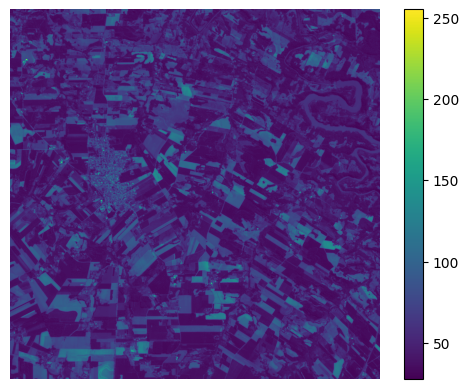

In [ ]:
image_path = '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/tci_tifs/1062_2020-8-8_S2L1C_21JYK_TCI.tif'


with rasterio.open(image_path) as src:
    image_data = src.read(1)

plt.imshow(image_data)
plt.axis('off')
plt.colorbar()
plt.show()

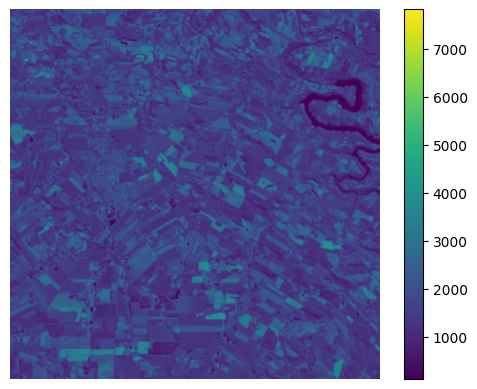

In [ ]:
image_path = '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/images/1062_2020-8-8_S2L1C_21JYK/b11.tif'

with rasterio.open(image_path) as src:
    image_data = src.read(1)

plt.imshow(image_data)
plt.axis('off')
plt.colorbar()
plt.show()

## Crop das Imagens

In [ ]:
# diretório que contém as imagens originais
input_dir = '/content/drive/MyDrive/modulo10/data/dataset_inteli_crop/masks'

# diretório onde as imagens cortadas serão salvas
output_dir = '/content/drive/MyDrive/modulo10/data/dataset_inteli_crop/testeImagensCortadasMasks'

os.makedirs(output_dir, exist_ok=True)

# dimensões dos cortes
crop_width, crop_height = 120, 120

# método para cortar uma imagem em pedaços menores
def crop_image(image_path, output_dir, crop_width, crop_height):
    img = Image.open(image_path)
    img_width, img_height = img.size

    for i in range(0, img_width, crop_width):
        for j in range(0, img_height, crop_height):
            box = (i, j, i + crop_width, j + crop_height)
            cropped_img = img.crop(box)
            cropped_img_path = os.path.join(output_dir, f"{os.path.basename(image_path).split('.')[0]}_{i}_{j}.png")
            cropped_img.save(cropped_img_path)

for filename in os.listdir(input_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_dir, filename)
        crop_image(image_path, output_dir, crop_width, crop_height)

In [ ]:
from PIL import Image
import os
import uuid

# diretórios contendo as imagens originais
input_image_dirs = [
    '/content/drive/MyDrive/modulo10/data/dataset_inteli_crop/marked_rgbs',
    '/content/drive/MyDrive/modulo10/data/dataset_inteli_crop/rgbs',
    '/content/drive/MyDrive/modulo10/data/dataset_inteli_crop/tci_tifs',
    '/content/drive/MyDrive/modulo10/data/dataset_inteli_crop/tci_pngs',
]
# diretório contendo as máscaras
input_mask_dir = '/content/drive/MyDrive/modulo10/data/dataset_inteli_crop/masks'

# diretórios onde as imagens e máscaras cortadas serão salvas
output_image_dir = '/content/drive/MyDrive/modulo10/data/dataset_inteli_crop/newTargetImages2'
output_mask_dir = '/content/drive/MyDrive/modulo10/data/dataset_inteli_crop/newTargetMasks2'

os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_mask_dir, exist_ok=True)

# dimensões dos cortes
crop_width, crop_height = 120, 120

# cortes por imagem
max_cuts = 5

# função para cortar a imagem e sua máscara em pedaços menores
def crop_image_and_mask(image_path, mask_path, output_image_dir, output_mask_dir, crop_width, crop_height, max_cuts):
    img = Image.open(image_path)
    mask = Image.open(mask_path)
    img_width, img_height = img.size

    # gera um nome aleatório para a imagem
    base_name = str(uuid.uuid4())[:8]

    ext = os.path.splitext(image_path)[1]

    cut_count = 0
    for i in range(0, img_width, crop_width):
        for j in range(0, img_height, crop_height):
            if cut_count >= max_cuts:
                return
            box = (i, j, i + crop_width, j + crop_height)
            cropped_img = img.crop(box)
            cropped_mask = mask.crop(box)
            cropped_img_path = os.path.join(output_image_dir, f"{base_name}_{cut_count+1}{ext}")
            cropped_mask_path = os.path.join(output_mask_dir, f"{base_name}_{cut_count+1}{ext}")
            cropped_img.save(cropped_img_path)
            cropped_mask.save(cropped_mask_path)
            cut_count += 1

# percorrer todos os diretórios de entrada
for input_image_dir in input_image_dirs:
    for filename in os.listdir(input_image_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff')):
            image_path = os.path.join(input_image_dir, filename)
            mask_path = os.path.join(input_mask_dir, filename)  # assumindo que as máscaras têm o mesmo nome que as imagens
            if os.path.exists(mask_path):  # garantindo que a máscara correspondente existe
                crop_image_and_mask(image_path, mask_path, output_image_dir, output_mask_dir, crop_width, crop_height, max_cuts)

# Modelo de Segmentação de Imagens com U-Net e VGG16

## Descrição Geral
Este notebook implementa um modelo de segmentação de imagens utilizando a arquitetura U-Net com backbone VGG16. A segmentação é realizada em imagens e máscaras carregadas de um diretório específico. A abordagem é útil para tarefas como segmentação de áreas agrícolas em imagens de satélite.


## Habilitando GPU no Google Colab
Para habilitar a GPU no Google Colab, siga os passos abaixo:

1. Vá para `Tempo de execução` ou `Runtime` no menu.
2. Selecione `Alterar tipo de tempo de execução` ou `Change runtime`.
3. Na janela que abrir, escolha `GPU` no menu suspenso `Acelerador de hardware`, recomendamos o uso da A100 pela capacidade mista de CPU e GPU.

Após realizar esses passos, a GPU será habilitada para o notebook.

## Importando libs necessárias

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

## Verificando se a GPU está sendo usada
Com o código abaixo é possível verificar se a GPU está sendo usada pelo TensorFlow.

In [ ]:
# Verifica se a GPU está disponível
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs disponíveis: {gpus}")
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print("Nenhuma GPU disponível.")

# Verifica se o TensorFlow está utilizando a GPU
if tf.test.gpu_device_name():
    print('GPU ativa:', tf.test.gpu_device_name())
else:
    print("Nenhuma GPU ativa.")

GPUs disponíveis: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU ativa: /device:GPU:0


## Preparação de Dados

A preparação de dados envolve carregar as imagens e as máscaras correspondentes, normalizando e transformando esses dados para o formato adequado para treinamento. As imagens são normalizadas para o intervalo [0, 1], e as máscaras são binarizadas, onde valores acima de 0.5 são considerados 1 (objeto de interesse) e abaixo são 0 (fundo).


## Função de perda personalizada

Definimos uma função de perda personalizada que combina a perda Dice e a perda binária de entropia cruzada para otimizar o modelo.

In [ ]:
def dice_loss(y_true, y_pred):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + 1) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + 1)

def combined_loss(y_true, y_pred):
    return tf.keras.losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

## Arquitetura do modelo

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

def load_images_and_masks_in_batches(data_dir, mask_dir, batch_size=51):
    file_names = sorted(os.listdir(data_dir))
    images = []
    masks = []
    count = 0

    for file in file_names:
        if file.endswith('.png'):
            img_path = os.path.join(data_dir, file)
            mask_path = os.path.join(mask_dir, file)
            try:
                img = load_img(img_path)  # Carrega a imagem no formato padrão
                img = img_to_array(img) / 255.0  # Normaliza a imagem para o intervalo [0, 1]
                mask = load_img(mask_path, color_mode='grayscale')  # Carrega a máscara como grayscale
                mask = img_to_array(mask) / 255.0  # Normaliza a máscara
                mask = (mask > 0.5).astype(np.float32)  # Binariza a máscara

                if img.shape == (120, 120, 3) and mask.shape == (120, 120, 1):
                    images.append(img)
                    masks.append(mask[:, :, 0])  # Garante que a máscara seja um array 2D
                    count += 1
                else:
                    print(f"Descartado por dimensões incorretas: {file}")

                if count == batch_size:
                    yield np.array(images), np.array(masks)
                    images, masks = [], []
                    count = 0
            except Exception as e:
                print(f"Erro ao carregar {file}: {e}")

    if images and masks:
        yield np.array(images), np.array(masks)

# Caminhos para os diretórios de imagens e máscaras
data_dir = '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/newTargetImages2'
mask_dir = '/content/drive/MyDrive/modulo10/data/dataset_inteli_felipe/newTargetMasks2'

# Processar imagens e máscaras em batches
all_images = []
all_masks = []
batch_size = 51
for batch_images, batch_masks in load_images_and_masks_in_batches(data_dir, mask_dir, batch_size):
    all_images.extend(batch_images)
    all_masks.extend(batch_masks)




### Descrição Do Modelo Utilizado - Estrutura Geral

O modelo U-Net é uma rede neural convolucional projetada para tarefas de segmentação de imagem. A arquitetura é composta por duas partes principais: o codificador (encoder) e o decodificador (decoder). A estrutura do U-Net permite capturar tanto o contexto global quanto os detalhes locais da imagem. O U-Net, proposto por Ronneberger et al. (2015), destaca-se pelo uso de conexões de skip entre o encoder e o decoder, que preservam informações de alta resolução essenciais para segmentação precisa. A extensão 3D U-Net, proposta por Çiçek et al. (2016), melhora ainda mais a capacidade do modelo em aplicações volumétricas. Ele é amplamente utilizado em diversas aplicações, incluindo a segmentação de tumores e análise de imagens médicas.

Referências:

Ronneberger, O., Fischer, P., & Brox, T. (2015). U-Net: Convolutional Networks for Biomedical Image Segmentation. In Medical Image Computing and Computer-Assisted Intervention – MICCAI 2015 (pp. 234-241).

Çiçek, Ö., et al. (2016). 3D U-Net: Learning Dense Volumetric Segmentation from Sparse Annotation. In Medical Image Computing and Computer-Assisted Intervention – MICCAI 2016 (pp. 424-432).


### Codificador (Encoder)


O codificador é baseado na arquitetura VGG16 pré-treinada no conjunto de dados ImageNet. Ele consiste em uma série de camadas convolucionais seguidas por camadas de pooling. A função do codificador é extrair características da imagem de entrada em diferentes níveis de abstração. As camadas convolucionais e de pooling são:


- **Block 1:**
  - 2 camadas Conv2D com 64 filtros e kernel 3x3, ativação ReLU
  - 1 camada MaxPooling2D com tamanho de pool 2x2

- **Block 2:**
  - 2 camadas Conv2D com 128 filtros e kernel 3x3, ativação ReLU
  - 1 camada MaxPooling2D com tamanho de pool 2x2

- **Block 3:**
  - 3 camadas Conv2D com 256 filtros e kernel 3x3, ativação ReLU
  - 1 camada MaxPooling2D com tamanho de pool 2x2

- **Block 4:**
  - 3 camadas Conv2D com 512 filtros e kernel 3x3, ativação ReLU
  - 1 camada MaxPooling2D com tamanho de pool 2x2

- **Block 5:**
  - 3 camadas Conv2D com 512 filtros e kernel 3x3, ativação ReLU

### Decodificador (Decoder)
O decodificador reconstrói a imagem de saída a partir das características extraídas pelo codificador. Utiliza operações de upsampling e camadas convolucionais para aumentar a resolução da imagem. As camadas do decodificador incluem:

- **UpSampling 1:**
  - 1 camada Conv2DTranspose com 512 filtros e kernel 2x2
  - 2 camadas Conv2D com 512 filtros e kernel 3x3, ativação ReLU

- **UpSampling 2:**
  - 1 camada Conv2DTranspose com 256 filtros e kernel 2x2
  - 2 camadas Conv2D com 256 filtros e kernel 3x3, ativação ReLU

- **UpSampling 3:**
  - 1 camada Conv2DTranspose com 128 filtros e kernel 2x2
  - 2 camadas Conv2D com 128 filtros e kernel 3x3, ativação ReLU

- **UpSampling 4:**
  - 1 camada Conv2DTranspose com 64 filtros e kernel 2x2
  - 2 camadas Conv2D com 64 filtros e kernel 3x3, ativação ReLU


### Saída (Output)
A última camada do decodificador é uma camada Conv2D com um único filtro e função de ativação sigmoid, produzindo a máscara segmentada binária.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, concatenate, Cropping2D, ZeroPadding2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def unet_with_vgg16_backbone(input_size=(120, 120, 3)):
    vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_size)

    # Freeze the VGG16 layers
    for layer in vgg16.layers:
        layer.trainable = False

    # Encoder
    s1 = vgg16.get_layer("block1_conv2").output
    s2 = vgg16.get_layer("block2_conv2").output
    s3 = vgg16.get_layer("block3_conv3").output
    s4 = vgg16.get_layer("block4_conv3").output
    b1 = vgg16.get_layer("block5_conv3").output

    # Decoder
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(b1)
    if u6.shape[1] != s4.shape[1] or u6.shape[2] != s4.shape[2]:
        u6 = ZeroPadding2D(((0, s4.shape[1] - u6.shape[1]), (0, s4.shape[2] - u6.shape[2])))(u6)
    u6 = concatenate([u6, s4])

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(u6)
    if u7.shape[1] != s3.shape[1] or u7.shape[2] != s3.shape[2]:
        u7 = ZeroPadding2D(((0, s3.shape[1] - u7.shape[1]), (0, s3.shape[2] - u7.shape[2])))(u7)
    u7 = concatenate([u7, s3])

    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(u7)
    if u8.shape[1] != s2.shape[1] or u8.shape[2] != s2.shape[2]:
        u8 = ZeroPadding2D(((0, s2.shape[1] - u8.shape[1]), (0, s2.shape[2] - u8.shape[2])))(u8)
    u8 = concatenate([u8, s2])

    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(u8)
    if u9.shape[1] != s1.shape[1] or u9.shape[2] != s1.shape[2]:
        u9 = ZeroPadding2D(((0, s1.shape[1] - u9.shape[1]), (0, s1.shape[2] - u9.shape[2])))(u9)
    u9 = concatenate([u9, s1])

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(u9)

    model = Model(inputs=vgg16.input, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Criar o modelo
model = unet_with_vgg16_backbone(input_size=(120, 120, 3))


## Divisão dos Dados e Treinamento
Dividimos os dados em conjuntos de treino e teste e treinamos o modelo U-Net com VGG16.

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(all_images, all_masks, test_size=0.1, random_state=42)

NameError: name 'images' is not defined

In [ ]:
# Criar o modelo
model = unet_with_vgg16_backbone(input_size=(120, 120, 3))

In [ ]:
# Treinar o modelo
results = model.fit(X_train, y_train, validation_split=0.1, batch_size=1, epochs=40)


Epoch 1/40


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model_8" expects 1 input(s), but it received 405 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:10' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:11' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:12' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:13' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:14' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:15' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:16' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:17' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:18' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:19' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:20' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:21' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:22' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:23' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:24' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:25' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:26' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:27' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:28' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:29' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:30' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:31' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:32' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:33' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:34' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:35' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:36' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:37' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:38' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:39' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:40' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:41' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:42' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:43' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:44' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:45' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:46' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:47' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:48' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:49' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:50' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:51' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:52' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:53' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:54' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:55' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:56' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:57' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:58' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:59' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:60' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:61' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:62' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:63' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:64' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:65' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:66' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:67' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:68' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:69' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:70' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:71' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:72' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:73' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:74' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:75' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:76' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:77' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:78' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:79' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:80' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:81' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:82' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:83' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:84' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:85' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:86' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:87' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:88' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:89' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:90' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:91' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:92' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:93' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:94' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:95' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:96' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:97' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:98' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:99' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:100' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:101' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:102' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:103' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:104' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:105' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:106' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:107' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:108' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:109' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:110' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:111' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:112' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:113' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:114' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:115' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:116' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:117' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:118' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:119' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:120' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:121' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:122' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:123' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:124' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:125' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:126' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:127' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:128' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:129' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:130' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:131' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:132' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:133' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:134' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:135' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:136' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:137' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:138' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:139' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:140' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:141' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:142' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:143' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:144' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:145' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:146' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:147' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:148' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:149' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:150' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:151' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:152' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:153' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:154' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:155' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:156' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:157' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:158' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:159' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:160' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:161' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:162' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:163' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:164' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:165' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:166' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:167' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:168' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:169' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:170' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:171' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:172' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:173' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:174' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:175' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:176' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:177' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:178' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:179' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:180' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:181' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:182' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:183' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:184' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:185' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:186' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:187' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:188' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:189' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:190' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:191' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:192' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:193' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:194' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:195' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:196' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:197' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:198' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:199' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:200' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:201' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:202' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:203' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:204' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:205' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:206' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:207' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:208' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:209' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:210' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:211' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:212' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:213' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:214' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:215' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:216' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:217' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:218' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:219' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:220' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:221' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:222' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:223' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:224' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:225' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:226' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:227' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:228' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:229' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:230' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:231' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:232' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:233' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:234' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:235' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:236' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:237' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:238' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:239' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:240' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:241' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:242' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:243' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:244' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:245' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:246' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:247' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:248' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:249' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:250' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:251' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:252' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:253' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:254' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:255' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:256' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:257' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:258' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:259' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:260' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:261' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:262' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:263' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:264' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:265' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:266' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:267' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:268' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:269' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:270' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:271' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:272' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:273' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:274' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:275' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:276' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:277' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:278' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:279' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:280' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:281' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:282' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:283' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:284' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:285' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:286' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:287' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:288' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:289' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:290' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:291' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:292' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:293' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:294' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:295' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:296' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:297' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:298' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:299' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:300' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:301' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:302' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:303' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:304' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:305' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:306' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:307' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:308' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:309' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:310' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:311' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:312' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:313' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:314' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:315' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:316' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:317' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:318' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:319' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:320' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:321' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:322' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:323' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:324' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:325' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:326' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:327' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:328' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:329' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:330' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:331' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:332' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:333' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:334' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:335' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:336' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:337' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:338' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:339' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:340' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:341' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:342' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:343' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:344' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:345' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:346' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:347' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:348' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:349' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:350' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:351' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:352' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:353' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:354' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:355' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:356' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:357' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:358' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:359' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:360' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:361' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:362' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:363' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:364' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:365' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:366' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:367' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:368' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:369' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:370' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:371' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:372' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:373' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:374' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:375' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:376' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:377' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:378' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:379' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:380' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:381' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:382' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:383' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:384' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:385' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:386' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:387' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:388' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:389' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:390' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:391' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:392' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:393' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:394' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:395' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:396' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:397' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:398' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:399' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:400' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:401' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:402' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:403' shape=(1, 120, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:404' shape=(1, 120, 3) dtype=float32>]


In [ ]:
# Avaliar o modelo
model.evaluate(X_test, y_test, batch_size=1)

135/135 [==============================] - 1s 7ms/step - loss: 0.4936 - accuracy: 0.7575


[0.4936334192752838, 0.7574552297592163]

## Plotando métricas
Plotamos as métricas de perda e acurácia do modelo durante o treinamento.

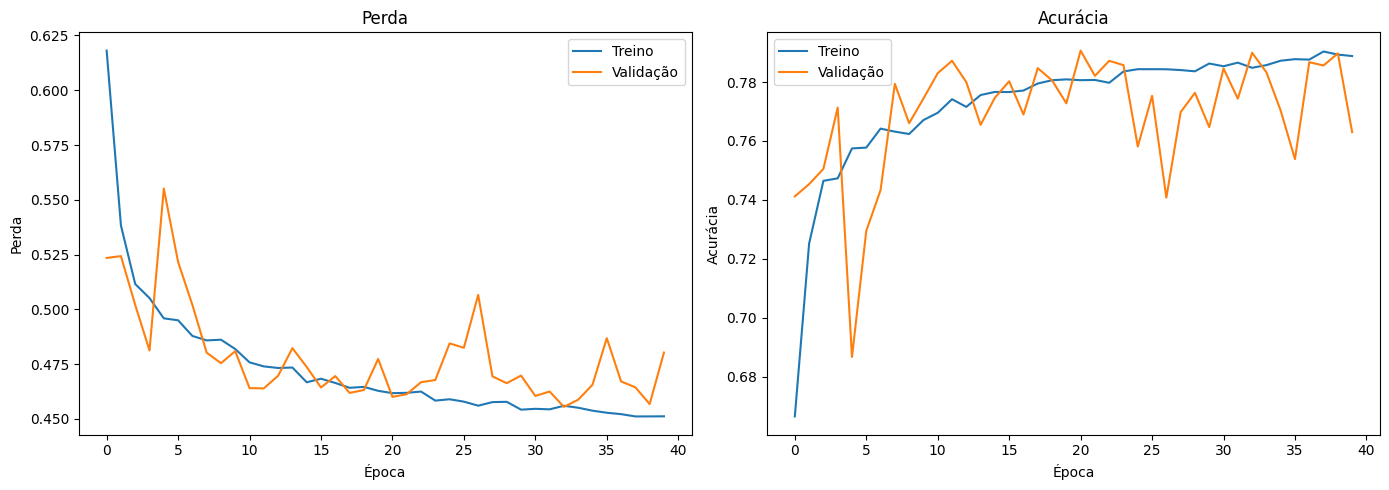

In [ ]:
def plot_metrics(history):
    # Plotando a perda (loss)
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Treino')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title('Perda')
    plt.ylabel('Perda')
    plt.xlabel('Época')
    plt.legend()

    # Plotando a acurácia (accuracy)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Treino')
    plt.plot(history.history['val_accuracy'], label='Validação')
    plt.title('Acurácia')
    plt.ylabel('Acurácia')
    plt.xlabel('Época')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(results)

## Plotando resultados
Plotamos as imagens de entrada, as máscaras reais e as máscaras preditas pelo modelo.

In [ ]:
# Função para plotar os resultados
def plot_results(X, y, model, ix=None):
    """Plotar a imagem, a máscara real e a máscara predita.

    Args:
    - X: array de imagens de entrada.
    - y: array de máscaras reais.
    - model: modelo treinado U-Net.
    - ix: índice da imagem a ser plotada. Se None, seleciona uma imagem aleatoriamente.
    """
    if ix is None:
        ix = np.random.randint(0, len(X))

    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(X[ix], cmap='gray')
    ax[0].title.set_text('Imagem Original')
    ax[0].axis('off')

    ax[1].imshow(y[ix].squeeze(), cmap='gray')  # Squeeze para remover dimensões extras se houver
    ax[1].title.set_text('Máscara Real')
    ax[1].axis('off')

    # Fazer a predição usando o modelo
    pred = model.predict(X[ix:ix+1])
    pred = (pred > 0.5).astype(np.float32)  # Binarizar a predição

    ax[2].imshow(pred.squeeze(), cmap='gray')  # Squeeze para garantir que está em 2D
    ax[2].title.set_text('Máscara Predita')
    ax[2].axis('off')

    plt.show()

1/1 [==============================] - 0s 208ms/step


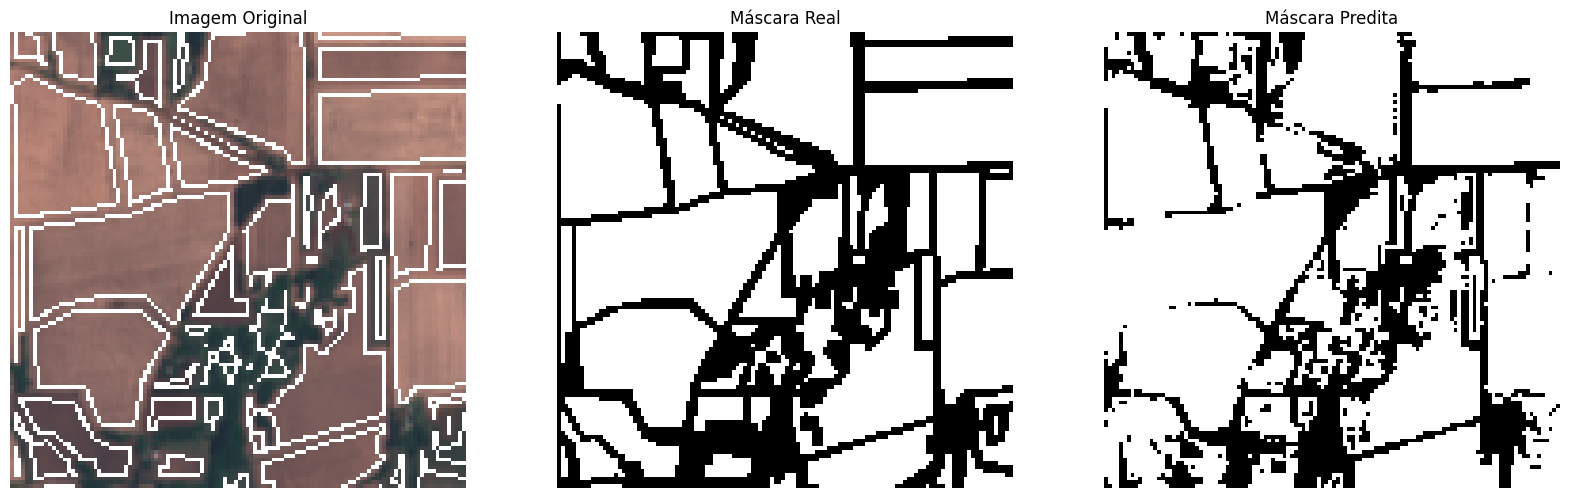

In [ ]:
index = None
plot_results(X_test, y_test, model, ix=index)

## Instruções para Obtenção do Modelo

### Passo 1: Aquisição dos Dados
Os dados utilizados neste exemplo são imagens e máscaras que podem ser carregadas a partir de um diretório local ou de uma unidade do Google Drive. Certifique-se de que as imagens e as máscaras estejam no formato PNG e que as máscaras sejam imagens em escala de cinza (grayscale).


### Passo 2: Configuração do Ambiente
Para utilizar a GPU no Google Colab:

1. Vá para `Tempo de execução` ou `Runtime` no menu.
2. Selecione `Alterar tipo de tempo de execução` ou `Change runtime`.
3. Na janela que abrir, escolha `GPU` no menu suspenso `Acelerador de hardware`, recomendamos o uso da A100 pela capacidade mista de CPU e GPU.

Após realizar esses passos, a GPU será habilitada para o notebook.

### Passo 3: Preparação dos Dados
Os dados devem ser normalizados e divididos em conjuntos de treino e teste. As imagens são normalizadas para o intervalo [0, 1], e as máscaras são binarizadas (valores acima de 0.5 são considerados 1 e abaixo são 0).

### Passo 4: Treinamento do Modelo
O modelo U-Net com backbone VGG16 é treinado utilizando os dados preparados. Ajuste os hiperparâmetros como número de épocas, tamanho do lote e taxa de aprendizado conforme necessário.

### Passo 5: Avaliação do Modelo
Após o treinamento, o modelo é avaliado no conjunto de teste para medir seu desempenho. Métricas como a perda e a acurácia são plotadas para análise.


### Passo 6: Refinamento do Modelo
Se o desempenho do modelo não for satisfatório, existem as seguintes estratégias de refinamento:
1. **Ajuste de Hiperparâmetros:** Modificar a taxa de aprendizado (learning rate ou `lr`), o número de épocas (`epochs`), o tamanho do lote (`batch_size`), etc.
2. **Aumento de Dados (Data Augmentation):** Utilize técnicas de aumento de dados para gerar mais exemplos de treino, como rotações, zoom, translações, etc.
3. **Arquitetura do Modelo:** Modificar a arquitetura do modelo, adicionando mais camadas ou unidades.
4. **Regularização:** Adicionar camadas de Dropout ou ajuste a regularização L2 para evitar overfitting.
5. **Treinamento com Mais Dados:** Adicionar mais dados de treino para melhorar a generalização do modelo.

# Instruções para deploy em um serviço em nuvem

As seguintes instruções fornecem um guia para preparar, fazer upload e fazer o deploy do modelo de segmentação no AWS SageMaker.

### 1. Preparação do ambiente

Instale a AWS CLI e configure suas credenciais:

In [ ]:
pip install awscli
aws configure

Instale o SDK do SageMaker:

In [ ]:
pip install sagemaker

### 2. Preparar o notebook

Certifique-se que todas as dependências do notebook estão instaladas:

In [ ]:
pip install numpy pandas scikit-learn matplotlib tensorflow

### 3. Preparação do modelo

Após o treinamento do modelo, salve-o no formato .h5:

In [ ]:
model.save('segmentation_model.h5')

Após isso, carregue o arquivo do modelo salvo para um bucket no S3:

In [ ]:
aws s3 cp segmentation_model.h5 s3://nome-do-bucket/modelos/segmentation_model.h5

### 4. Deploy no SageMaker

Crie um arquivo inference.py e coloque o seguinte código que contém a lógica de carregamento do modelo e inferência:

In [ ]:
import json
import numpy as np
from tensorflow.keras.models import load_model

def model_fn(model_dir):
    model = load_model(f'{model_dir}/segmentation_model.h5')
    return model

def input_fn(request_body, request_content_type):
    if request_content_type == 'application/json':
        return np.array(json.loads(request_body)['instances'])
    else:
        raise ValueError('Esse modelo apenas suporta JSON')

def predict_fn(input_data, model):
    predictions = model.predict(input_data)
    return predictions

def output_fn(prediction, response_content_type):
    return json.dumps({'predições': prediction.tolist()})

Utilize o SDK do SageMaker para criar um endpoint para o modelo:

In [ ]:
import sagemaker
from sagemaker.tensorflow import TensorFlowModel

sagemaker_session = sagemaker.Session()
role = 'arn:aws:iam::sua-conta:permissao/sagemaker-permissao'

model = TensorFlowModel(model_data='s3://nome-bucket/modelos/segmentation_model.h5',
                        role=role,
                        entry_point='inference.py',
                        framework_version='2.3',
                        sagemaker_session=sagemaker_session)

predictor = model.deploy(initial_instance_count=1,
                         instance_type='ml.m4.xlarge')

### 5. Teste e validação

Envie uma requisição de teste ao endpoint para garantir que tudo esteja funcionando corretamente:

In [ ]:
import json
import numpy as np
import boto3

runtime = boto3.client('runtime.sagemaker')
payload = json.dumps({'instances': np.random.rand(1, 224, 224, 3).tolist()})

response = runtime.invoke_endpoint(EndpointName=predictor.endpoint_name,
                                   ContentType='application/json',
                                   Body=payload)

result = json.loads(response['Body'].read().decode())
print(result)

### 6. Limpeza

Para evitar custos desnecessários, remova os recursos quando terminar:

In [ ]:
predictor.delete_endpoint()